## Function to see detection overlap in space and time

In [94]:
import os
import pickle
import pandas as pd
from glob import glob
from datetime import datetime, timedelta
from geopy.distance import geodesic
from typing import Any, Iterable, List, Tuple, Union
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import timedelta
from typing import List
from tqdm import tqdm 

### station metadata list

In [41]:
station_metadata = [{"id": "J18B", "lat": 44.0, "lon": -125.5},
                    {"id": "J10B", "lat": 43.3, "lon": -125.5},
                    {"id": "G34B", "lat": 42.6, "lon": -125.2},
                    {"id": "G26B", "lat": 41.9, "lon": -125.2},
                    {"id": "J67C", "lat": 48.2, "lon": -127.1},
                    {"id": "J26C", "lat": 44.7, "lon": -125.5},
                    {"id": "J34C", "lat": 45.3, "lon": -125.4},
                    {"id": "J51C", "lat": 46.8, "lon": -126.2},
                    {"id": "J10D", "lat": 43.3, "lon": -125.5},
                    {"id": "J26D", "lat": 44.7, "lon": -125.5},
                    {"id": "J18D", "lat": 43.9, "lon": -125.5},
                    {"id": "G34D", "lat": 42.6, "lon": -125.4},
                    {"id": "G26D", "lat": 41.9, "lon": -125.3},
                    {"id": "G18D", "lat": 41.3, "lon": -125.3},
                    {"id": "NCBC", "lat": 48.4, "lon": -126.2},
                    {"id": "NC89", "lat": 48.75, "lon": -126.9},
                    {"id": "M01C", "lat": 49.2, "lon": -126.7},
                    {"id": "J73C", "lat": 48.8, "lon": -126.2},
                    {"id": "M02C", "lat": 48.3, "lon": -125.6},
                    {"id": "M03C", "lat": 47.9, "lon": -125.1},
                    {"id": "M04C", "lat": 47.6, "lon": -125.2},
                    {"id": "J65C", "lat": 48.0, "lon": -125.1},
                    {"id": "J59C", "lat": 47.5, "lon": -126.4},
                    {"id": "J58C", "lat": 47.3, "lon": -125.5},
                    {"id": "FN16C", "lat": 46.8, "lon": -125.5},
                    {"id": "FN11C", "lat": 46.8, "lon": -125.1},
                    {"id": "FN17C", "lat": 46.7, "lon": -125.0},
                    {"id": "J49C", "lat": 46.4, "lon": -124.4},
                    {"id": "M05C", "lat": 46.2, "lon": -124.9},
                    {"id": "J42C", "lat": 45.9, "lon": -125.3},
                    {"id": "J41C", "lat": 45.8, "lon": -124.5},
                    {"id": "M06C", "lat": 45.5, "lon": -124.9},
                    {"id": "J33B", "lat": 45.1, "lon": -124.6},
                    {"id": "M07C", "lat": 44.9, "lon": -125.1},
                    {"id": "M18B", "lat": 44.9, "lon": -125.0},
                    {"id": "FC03D", "lat": 44.8, "lon": -124.7},
                    {"id": "J25C", "lat": 44.5, "lon": -124.6},
                    {"id": "J25B", "lat": 44.5, "lon": -124.6},
                    {"id": "J25D", "lat": 44.5, "lon": -124.6},
                    {"id": "M09B", "lat": 44.2, "lon": -125.1},
                    {"id": "M08C", "lat": 44.1, "lon": -124.9},
                    {"id": "J17D", "lat": 43.8, "lon": -124.6},
                    {"id": "M10B", "lat": 43.6, "lon": -125.0},
                    {"id": "M13D", "lat": 43.6, "lon": -125.0},
                    {"id": "J09B", "lat": 43.2, "lon": -124.7},
                    {"id": "M11B", "lat": 42.9, "lon": -125.0},
                    {"id": "M14D", "lat": 42.6, "lon": -125.0},
                    {"id": "G33D", "lat": 42.7, "lon": -124.8},
                    {"id": "G33B", "lat": 42.5, "lon": -124.7},
                    {"id": "M15D", "lat": 42.2, "lon": -124.9},
                    {"id": "M12B", "lat": 42.2, "lon": -124.9},
                    {"id": "G25B", "lat": 41.9, "lon": -124.6},
                    {"id": "M13B", "lat": 41.7, "lon": -124.9},
                    {"id": "M16D", "lat": 41.7, "lon": -124.8},
                    {"id": "G18B", "lat": 41.3, "lon": -124.9},
                    {"id": "G17D", "lat": 41.4, "lon": -124.4},
                    {"id": "G17B", "lat": 41.3, "lon": -124.3},
                    {"id": "M17D", "lat": 41.0, "lon": -124.6},
                    {"id": "M14B", "lat": 41.0, "lon": -124.6},
                    {"id": "BACME", "lat": 48.3, "lon": -126.1},
                    {"id": "BACND", "lat": 48.3, "lon": -126.2},
                    {"id": "CQS64", "lat": 48.7, "lon": -126.9},
                    {"id": "FN13C", "lat": 47.0, "lon": -125.3},
                    {"id": "FN12C", "lat": 46.9, "lon": -125.1},
                    {"id": "FN14C", "lat": 47.0, "lon": -125.0},
                    {"id": "FN10C", "lat": 46.9, "lon": -125.0},
                    {"id": "FN08C", "lat": 46.9, "lon": -124.9},
                    {"id": "FN09C", "lat": 46.8, "lon": -124.9},
                    {"id": "FN07C", "lat": 46.9, "lon": -124.8},
                    {"id": "FN06C", "lat": 46.9, "lon": -124.7},
                    {"id": "FN04C", "lat": 46.9, "lon": -124.6},
                    {"id": "FN03C", "lat": 46.9, "lon": -124.5},
                    {"id": "FN05C", "lat": 46.9, "lon": -124.7},
                    {"id": "J57C", "lat": 47.1, "lon": -124.5},
                    {"id": "FN02C", "lat": 46.9, "lon": -124.4},
                    {"id": "FN01C", "lat": 46.9, "lon": -124.3},
                    {"id": "FN19C", "lat": 46.7, "lon": -124.4},
                    {"id": "FN17C", "lat": 46.7, "lon": -125.0},
                    {"id": "FN18C", "lat": 46.7, "lon": -124.7}]


### define functions

In [57]:
def flatten_data(data: Iterable) -> Iterable:
    for item in data:
        if isinstance(item, (list, tuple)) and all(isinstance(sub, (list, tuple)) for sub in item):
            # grouping-of-groupings: flatten down
            yield from flatten_data(item)
        else:
            yield item

In [58]:
def process_file(path: str, tremor_threshold: float = 100.0) -> List[Tuple]:
    with open(path, "rb") as f:
        raw = pickle.load(f)

    # Flatten out nested lists/tuples
    flat = list(flatten_data(raw))

    # valid classification entries
    classifications = [
        entry
        for entry in flat
        if isinstance(entry, (list, tuple))
        and len(entry) > 2
        and isinstance(entry[2], (int, float))
        and entry[2] > 1
    ]
    
    tremors = [c for c in classifications if c[4] > tremor_threshold]
    return tremors

In [102]:
def load_metadata(meta: List[dict]) -> dict:
    return {s["id"]: s for s in meta}

In [60]:
def process_folder(
    folder: str,
    station_meta: dict,
    tremor_threshold: float = 100.0
) -> dict:
    """
    Returns a mapping: station_id -> {"meta": {...}, "tremors": [entries...]}
    """
    results = {}
    for fname in os.listdir(folder):
        if not fname.endswith(".pickle"):
            continue

        fullpath = os.path.join(folder, fname)
        tremors = process_file(fullpath, tremor_threshold)

        # Extract station code
        if tremors:
            stn = tremors[0][1]
        else:
            # built in check: strip “_raw.pickle” from file
            stn = os.path.splitext(fname)[0].split("_")[0]

        results[stn] = {
            "meta": station_meta.get(stn),
            "tremors": tremors
        }
    return results


# use function
meta_lookup = load_metadata(station_metadata)
stations = process_folder("classifications", meta_lookup, tremor_threshold=100.0)

for stn, info in stations.items():
    print(f"{stn}: {len(info['tremors'])} tremors   coords: {info['meta']}")


M11B: 6367 tremors   coords: {'id': 'M11B', 'lat': 42.9, 'lon': -125.0}
J26C: 0 tremors   coords: {'id': 'J26C', 'lat': 44.7, 'lon': -125.5}
M14D: 0 tremors   coords: {'id': 'M14D', 'lat': 42.6, 'lon': -125.0}
J26D: 1056 tremors   coords: {'id': 'J26D', 'lat': 44.7, 'lon': -125.5}
G33D: 7201 tremors   coords: {'id': 'G33D', 'lat': 42.7, 'lon': -124.8}
J34C: 0 tremors   coords: {'id': 'J34C', 'lat': 45.3, 'lon': -125.4}
J10D: 656 tremors   coords: {'id': 'J10D', 'lat': 43.3, 'lon': -125.5}
G34D: 135 tremors   coords: {'id': 'G34D', 'lat': 42.6, 'lon': -125.4}
G26D: 25 tremors   coords: {'id': 'G26D', 'lat': 41.9, 'lon': -125.3}
G26B: 25 tremors   coords: {'id': 'G26B', 'lat': 41.9, 'lon': -125.2}
J18D: 1165 tremors   coords: {'id': 'J18D', 'lat': 43.9, 'lon': -125.5}
G18D: 1 tremors   coords: {'id': 'G18D', 'lat': 41.3, 'lon': -125.3}
J51C: 0 tremors   coords: {'id': 'J51C', 'lat': 46.8, 'lon': -126.2}
G34B: 84 tremors   coords: {'id': 'G34B', 'lat': 42.6, 'lon': -125.2}
J18B: 835 tremo

In [64]:
def find_overlaps(
    stations: dict,
    buffer_minutes: float = 10.0
) -> List[dict]:
    buf = timedelta(minutes=buffer_minutes)
    overlap_list = []
    stns = list(stations.keys())

    # Total iterations = sum of tremors in all station pairs
    total = sum(
        len(stations[s1]["tremors"]) * len(stations[s2]["tremors"])
        for i, s1 in enumerate(stns)
        for s2 in stns[i+1:]
    )

    with tqdm(total=total, desc="Finding overlaps", unit="pair") as pbar:
        for i in range(len(stns)):
            s1 = stns[i]
            for j in range(i+1, len(stns)):
                s2 = stns[j]

                for t1 in stations[s1]["tremors"]:
                    start1, end1 = t1[0]
                    s1_start = start1 - buf
                    s1_end   = end1   + buf

                    for t2 in stations[s2]["tremors"]:
                        start2, end2 = t2[0]
                        s2_start = start2 - buf
                        s2_end   = end2   + buf

                        if (s1_start <= s2_end) and (s2_start <= s1_end):
                            overlap_list.append({
                                "station_a": s1,
                                "station_b": s2,
                                "window_a": (start1, end1),
                                "window_b": (start2, end2)
                            })
                        pbar.update(1)

    return overlap_list


In [ ]:
overlaps = find_overlaps(stations, buffer_minutes=10)
print(f"Detected {len(overlaps)} inter‐station overlaps.")
for o in overlaps[:5]:
    print(o)

Finding overlaps:  99%|█████████▊| 1361030757/1380549909 [3:37:54<03:27, 93913.55pair/s]  

In [69]:
print('done')

done


In [78]:
# save overlaps
with open("overlaps.pickle", "wb") as f:
    pickle.dump(overlaps, f)

In [88]:
filtered_tremor = [o for o in overlaps
                if len(stations[o["station_a"]]["tremors"]) < 200
                and len(stations[o["station_b"]]["tremors"]) < 200]
print(len(filtered_tremor))


54


In [107]:
# Create a lookup for station coordinates
station_coords = {s["id"]: (s["lat"], s["lon"]) for s in station_metadata}

# Filter overlaps within 100 km
tremor_overlap = []
for tremor in filtered_tremor:
    a, b = tremor['station_a'], tremor['station_b']
    if a in station_coords and b in station_coords:
        dist = geodesic(station_coords[a], station_coords[b]).km
        if dist <= 100:
            tremor['distance_km'] = round(dist, 2)
            tremor_overlap.append(tremor)


[{'station_a': 'G34D',
  'station_b': 'G26D',
  'window_a': (2014-10-21T08:23:13.611172Z, 2014-10-21T08:26:53.636637Z),
  'window_b': (2014-10-21T08:22:53.609756Z, 2014-10-21T08:28:13.646798Z),
  'distance_km': 78.19},
 {'station_a': 'G26B',
  'station_b': 'G18B',
  'window_a': (2012-10-31T19:40:48.318478Z, 2012-10-31T19:41:18.321950Z),
  'window_b': (2012-10-31T19:45:48.347402Z, 2012-10-31T19:46:58.355505Z),
  'distance_km': 71.18},
 {'station_a': 'G18B',
  'station_b': 'G17B',
  'window_a': (2013-03-02T04:03:21.806763Z, 2013-03-02T04:11:31.863483Z),
  'window_b': (2013-03-02T04:08:41.844406Z, 2013-03-02T04:45:42.101380Z),
  'distance_km': 50.25},
 {'station_a': 'G18B',
  'station_b': 'G17B',
  'window_a': (2013-03-02T04:03:21.806763Z, 2013-03-02T04:11:31.863483Z),
  'window_b': (2013-03-02T04:08:41.844406Z, 2013-03-02T04:45:42.101380Z),
  'distance_km': 50.25},
 {'station_a': 'G18B',
  'station_b': 'G17B',
  'window_a': (2013-03-02T04:49:02.123929Z, 2013-03-02T04:52:22.147080Z),
  'w

In [170]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt

client = Client("IRIS")

# Choose which overlap to view
index = -2 

overlap = tremor_overlap[index]

station_a = overlap["station_a"]
station_b = overlap["station_b"]
print(station_a)
print(station_b)

FN19C
FN02C


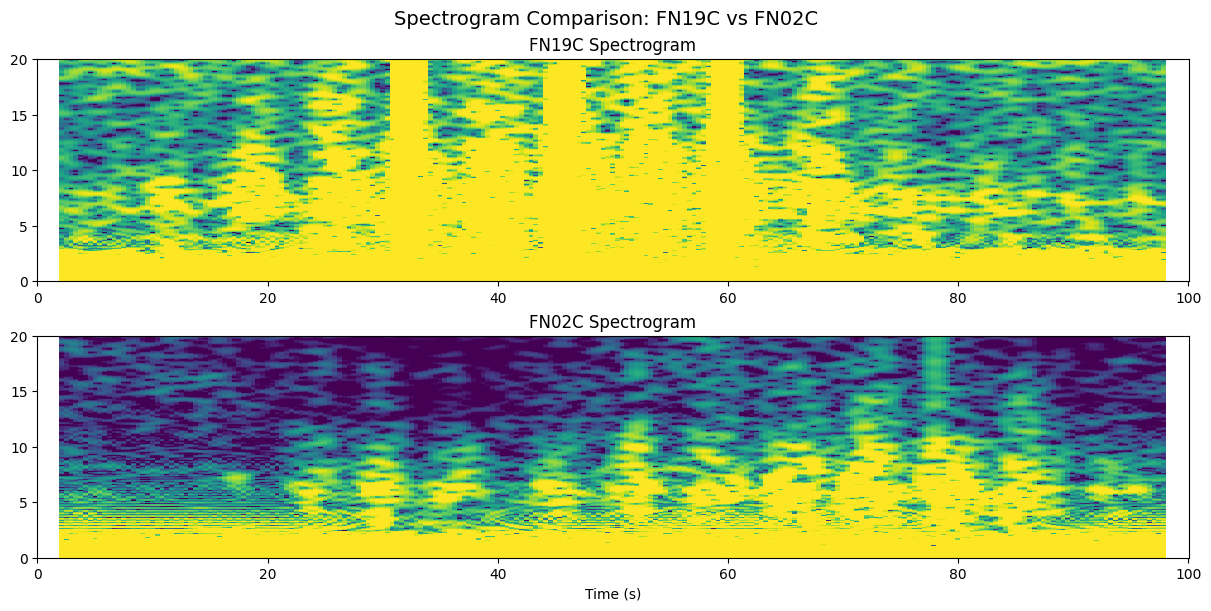

[]

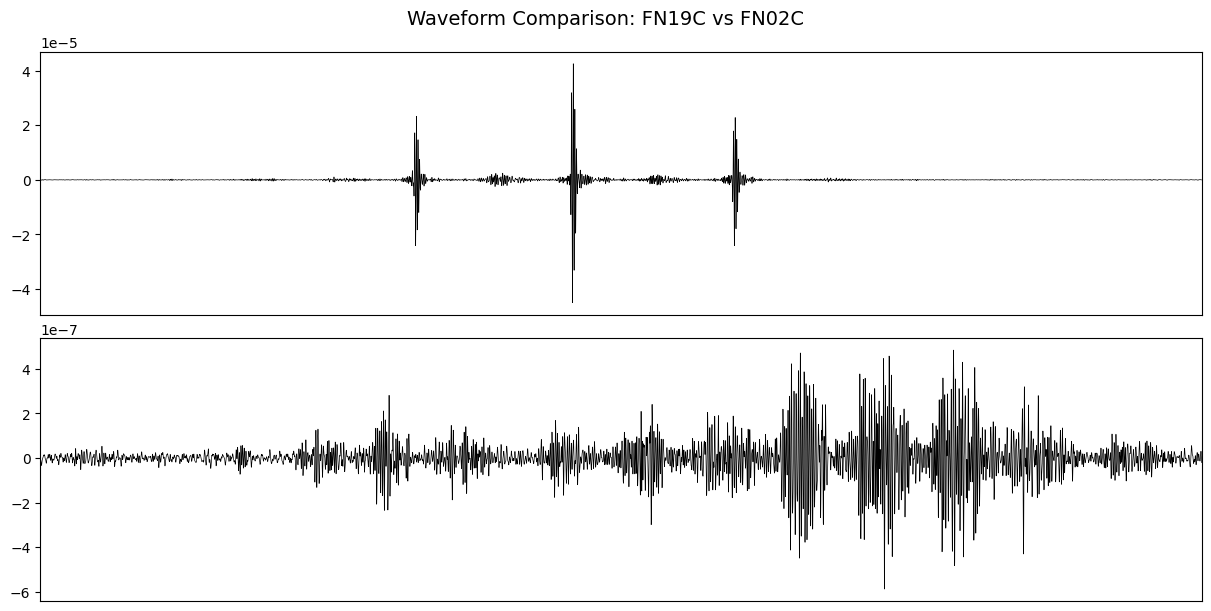

In [176]:

# Extract overlap info
overlap = tremor_overlap[index]
t1 = UTCDateTime(overlap["window_a"][0])
t2 = UTCDateTime(overlap["window_a"][1])

# Plot setup (spectrogram)
fig, ax = plt.subplots(2, figsize=(12, 6), constrained_layout=True)
fig.suptitle(f"Spectrogram Comparison: {station_a} vs {station_b}", fontsize=14)

# Station A spectrogram
st_a = client.get_waveforms("7D", station_a, "*", "HH2", t1 - 35, t2 + 35)
st_a.trim(starttime=t1 - 30, endtime=t2 + 30)
st_a[0].spectrogram(axes=ax[0], wlen=5, dbscale=True)
ax[0].images[0].set_clim(0, 30)
ax[0].set_ylim([0, 20])
ax[0].set_title(f"{station_a} Spectrogram")
ax[0].set_xlabel("")

# Station B spectrogram
st_b = client.get_waveforms("7D", station_b, "*", "HH2", t1 - 35, t2 + 35)
st_b.trim(starttime=t1 - 30, endtime=t2 + 30)
st_b[0].spectrogram(axes=ax[1], wlen=5, dbscale=True)
ax[1].images[0].set_clim(0, 30)
ax[1].set_ylim([0, 20])
ax[1].set_title(f"{station_b} Spectrogram")
ax[1].set_xlabel("Time (s)")

plt.show()
# Plot setup (waveform)
fig, ax = plt.subplots(2, figsize=(12, 6), constrained_layout=True)
fig.suptitle(f"Waveform Comparison: {station_a} vs {station_b}", fontsize=14)

# Station A waveform
st_a = client.get_waveforms("7D", station_a, "*", "HH2", t1-35, t2+35,attach_response=True);
st_a.filter('bandpass',freqmin=3,freqmax=10)
st_a.remove_response()
st_a.trim(starttime=t1-30,endtime=t2+30)
ax[0].plot(st_a[0].data,'k',linewidth=0.5)
ax[0].set_xlim(0,len(st_a[0].data))
ax[0].set_xticks([])

# Station B waveform
st_b = client.get_waveforms("7D", station_b, "*", "HH2", t1-35, t2+35,attach_response=True);
st_b.filter('bandpass',freqmin=3,freqmax=10)
st_b.remove_response()
st_b.trim(starttime=t1-30,endtime=t2+30)
ax[1].plot(st_b[0].data,'k',linewidth=0.5)
ax[1].set_xlim(0,len(st_b[0].data))
ax[1].set_xticks([])

In [177]:
coords_a = station_coords[station_a]
coords_b = station_coords[station_b]
dist_km = geodesic(coords_a, coords_b).km

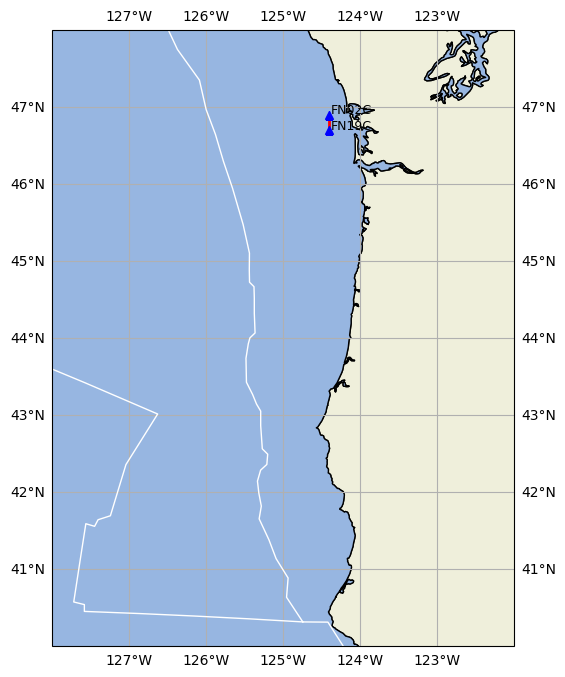

In [178]:
# Create map plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-128, -122, 48, 40], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.gridlines(draw_labels=True)

lat_a, lon_a = coords_a
lat_b, lon_b = coords_b

# Plot connection line
ax.plot([lon_a, lon_b], [lat_a, lat_b], color='red', linewidth=2, linestyle = '--', transform=ccrs.PlateCarree())

# Plot station markers
ax.plot(lon_a, lat_a, marker='^', color='blue', markersize=6, transform=ccrs.PlateCarree())
ax.plot(lon_b, lat_b, marker='^', color='blue', markersize=6, transform=ccrs.PlateCarree())

ax.text(lon_a + 0.02, lat_a + 0.02, station_a, fontsize=9, transform=ccrs.PlateCarree())
ax.text(lon_b + 0.02, lat_b + 0.02, station_b, fontsize=9, transform=ccrs.PlateCarree())

import json
with open('PB2002_boundaries.json', 'r') as f:
    plate_boundaries = json.load(f)
    
for feature in plate_boundaries['features']:
    coords = feature['geometry']['coordinates']
    if feature['geometry']['type'] == 'LineString':
        lons, lats = zip(*coords)
        ax.plot(lons, lats, color='white', linewidth=1, transform=ccrs.PlateCarree())
    elif feature['geometry']['type'] == 'MultiLineString':
        for line in coords:
            lons, lats = zip(*line)
            ax.plot(lons, lats, color='white', linewidth=1, transform=ccrs.PlateCarree())